# Problem 1


In [1061]:
# Import the necessary libraries and read the dataset from GitHub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# from treenode import TreeNode

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [1062]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1063]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1064]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Preprocessing of Dataset
### Handling of missing values


In [1065]:
print("Percentage of missing values in a column:\n")
print(((df.isna().sum())/df.shape[0])*100)

Percentage of missing values in a column:

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [1066]:
# Fill the missing age values based on age and pclass
mean_age_by_sex_pclass = round(df.groupby(['Sex', 'Pclass'])['Age'].mean(), 0)

def fill_missing_age(row):
    if pd.isnull(row['Age']):
        return mean_age_by_sex_pclass[row['Sex'], row['Pclass']]
    else:
        return row['Age']

df['Age'] = df['Age'].fillna(df.apply(fill_missing_age, axis=1))

# Remove the Cabin column and rows with no information of embark
df.drop(columns=['Cabin'], inplace = True)
df.dropna(subset=['Embarked'], inplace = True)
print(((df.isna().sum())/df.shape[0])*100)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


### Dropping and merging of trivial features

In [1067]:
# Drop unnecessary features
df.drop(columns = ["PassengerId", "Name", "Ticket"], inplace = True)

# Merge same kind of features
df['Family Size'] = df['Parch'] + df['SibSp']
df.drop(columns = ["Parch", "SibSp"], inplace = True)

### Checking for Outliers

<Axes: xlabel='Survived', ylabel='Family Size'>

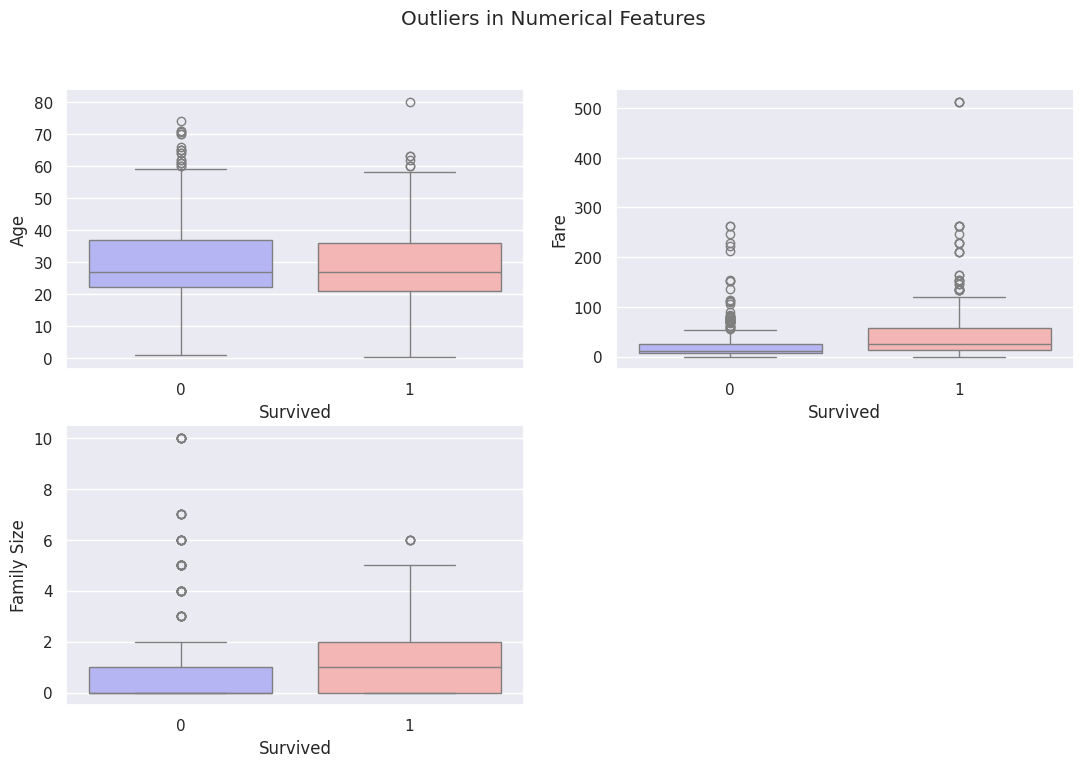

In [1068]:
figure, axes = plt.subplots(2, 2, figsize = (13, 8))
figure.delaxes(axes[1][1])

figure.suptitle("Outliers in Numerical Features")
sns.boxplot(ax = axes[0, 0], data = df, x = "Survived", y = "Age", palette = "bwr")
sns.boxplot(ax = axes[0, 1], data = df, x = "Survived", y = "Fare", palette = "bwr")
sns.boxplot(ax = axes[1, 0], data = df, x = "Survived", y = "Family Size", palette = "bwr")

### Performing categorical encoding

In [1069]:
# Replace sex and embarked column with numerical values

df["Sex"].replace("female", 0, inplace = True)
df["Sex"].replace("male", 1, inplace = True)

embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
df['Embarked'] = [embarked_mapping[embarked] for embarked in df['Embarked']]
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,0,3,1,22.0,7.2500,1,1
1,1,1,0,38.0,71.2833,2,1
2,1,3,0,26.0,7.9250,1,0
3,1,1,0,35.0,53.1000,1,1
4,0,3,1,35.0,8.0500,1,0
5,0,3,1,27.0,8.4583,3,0
6,0,1,1,54.0,51.8625,1,0
7,0,3,1,2.0,21.0750,1,4
8,1,3,0,27.0,11.1333,1,2
9,1,2,0,14.0,30.0708,2,1


## Visualisation of feature target dependence

<Axes: xlabel='Survived', ylabel='Fare'>

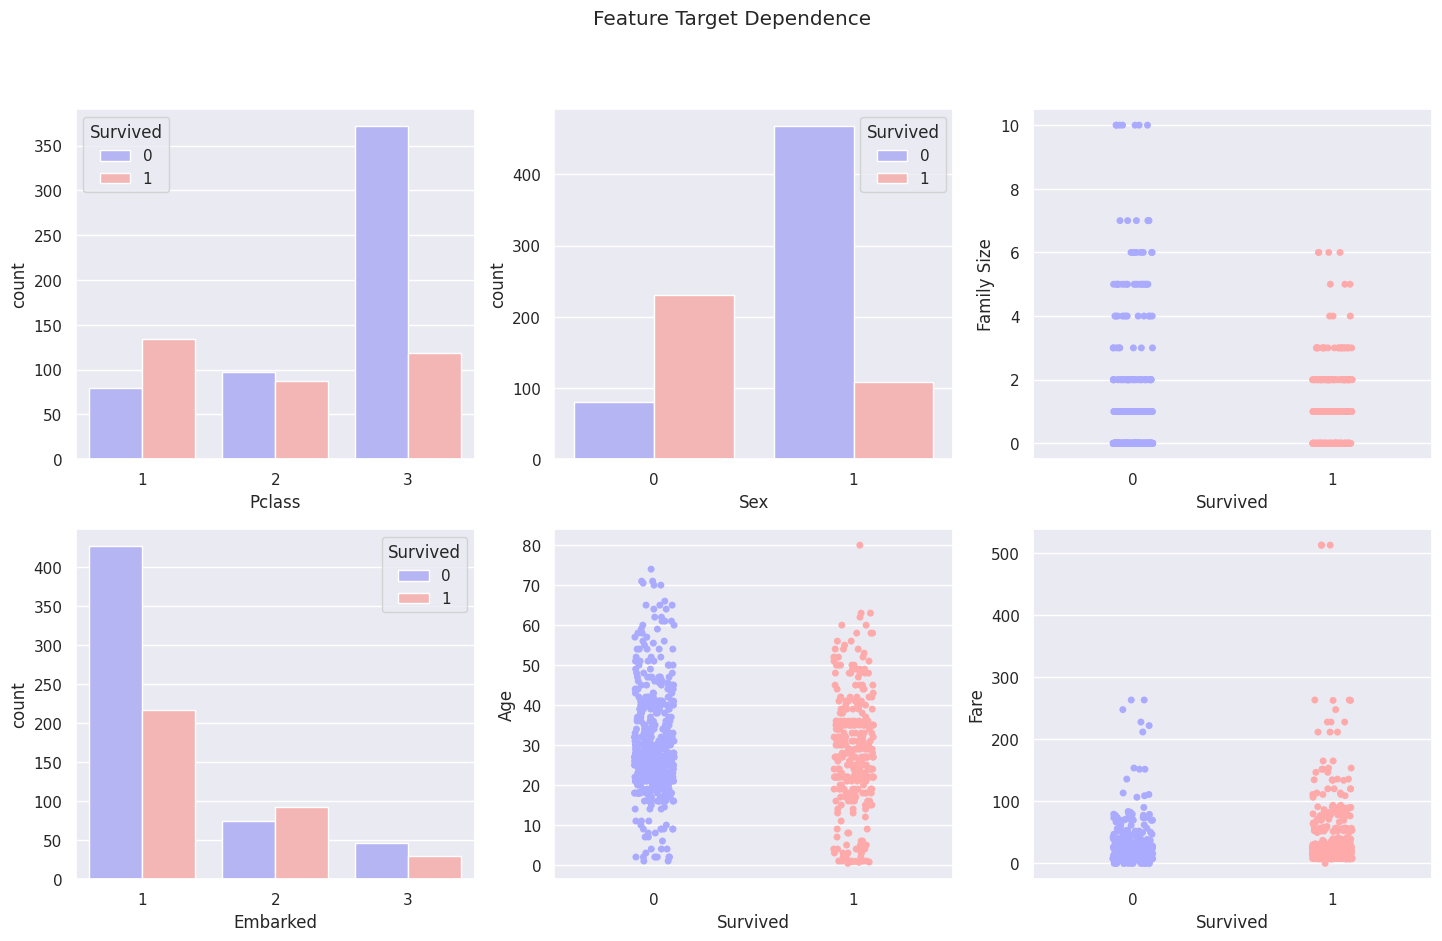

In [1070]:
figure, axes = plt.subplots(2, 3, figsize = (17.5, 10))
figure.suptitle("Feature Target Dependence")

sns.countplot(ax = axes[0, 0], data = df, x = 'Pclass', hue = 'Survived', palette = 'bwr')
sns.countplot(ax = axes[0, 1], data = df, x = 'Sex', hue = 'Survived', palette = 'bwr')
sns.stripplot(ax = axes[0, 2], data = df, x = 'Survived', y = 'Family Size', palette = 'bwr')
sns.countplot(ax = axes[1, 0], data = df, x = 'Embarked', hue = 'Survived', palette = 'bwr')
sns.stripplot(ax = axes[1, 1], data = df, x = "Survived", y = "Age", palette = "bwr")
sns.stripplot(ax = axes[1, 2], data = df, x = "Survived", y = "Fare", palette = "bwr")

<Axes: title={'center': 'Correlation of Features'}>

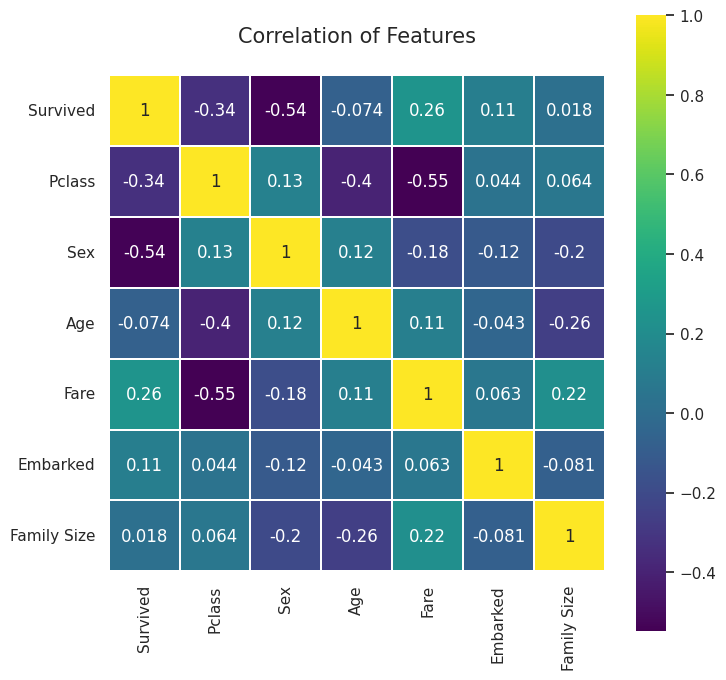

In [1071]:
# Heat Map to visualise the correlations between data
colormap = plt.cm.viridis
plt.figure(figsize=(8,8))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Splitting the data

In [1072]:
np.random.seed(37)
total_samples = len(df)
train_size = int(0.7 * total_samples)
validation_size = int(0.2 * total_samples)

df = df.sample(frac=1).reset_index(drop=True) # Shuffle the dataset to ensure randomness

train_data = df[:train_size]
validation_data = df[train_size:train_size + validation_size]
test_data = df[train_size + validation_size:]

print("Size of train, validation and test dataset:", train_data.shape[0], validation_data.shape[0], test_data.shape[0])

Size of train, validation and test dataset: 622 177 90


## Implementation of Helper functions

In [1073]:
# Function to calculate entropy
def calculateEntropy(sub):
    unique_sub, counts = np.unique(sub, return_counts=True)
    prob = counts / len(sub)
    entropy = -np.sum(prob * np.log2(prob))
    return entropy

# Function to decide the split value
def entropySplit(data, feature, target):
    bestGain = float('0')
    bestThreshold = None

    dfSorted = data.copy()
    dfSorted[feature] = dfSorted[feature].drop_duplicates()
    dfSorted.dropna(subset=[feature], inplace = True)
    dfSorted = dfSorted.sort_values(by=feature)

    entropyTotal = calculateEntropy(data[target])

    # Iterate through potential split points
    for i in range(1, len(dfSorted)):

        threshold = (dfSorted.iloc[i-1][feature] + dfSorted.iloc[i][feature])/2
        leftSub = data[data[feature] < threshold][target]
        rightSub = data[data[feature] > threshold][target]

        # Calculate entropy for the left and right subsets
        entropyLeft = calculateEntropy(leftSub)
        entropyRight = calculateEntropy(rightSub)
        weightedEntropy = (len(leftSub) / len(data)) * entropyLeft + (len(rightSub) / len(data)) * entropyRight
        gain = entropyTotal - weightedEntropy

        # Update the best split
        if gain > bestGain:
            bestGain = gain
            bestThreshold = threshold

    return bestGain, bestThreshold

In [1074]:
# Function to decide the best attribute(feature) for splitting
def bestAttribute(data):
    bestAttr = None
    bestGain = float('0')
    bestThreshold = None

    for i in range(0, len(df.columns)):
        feature = df.columns[i]
        if(feature == 'Survived'):
            continue

        gain, threshold = entropySplit(data.copy(), feature, 'Survived')

        if(gain >= bestGain):
            bestGain = gain
            bestAttr = df.columns[i]
            bestThreshold = threshold

    leftData = data[data[bestAttr] < bestThreshold]
    rightData = data[data[bestAttr] > bestThreshold]

    return leftData, rightData, bestAttr, bestGain, bestThreshold

In [1075]:
# Class for the implementation of tree nodes
class TreeNode():
    def __init__(self, data, feature, threshold, gain):
        self.data = data.copy()
        self.feature = feature
        self.threshold = threshold
        self.gain = gain
        self.left = None
        self.right = None
        self.isLeaf = False
        self.survived = 0

In [1076]:
# Function to classify the node as leaf node
def classify(data, node):
    node.isLeaf = True

    # Decide the survival value
    if 1 in data['Survived'].value_counts():
        count1 = data['Survived'].value_counts()[1]
        if count1 / len(data['Survived']) >= 0.5:
            node.survived = 1

    node.threshold = None
    node.feature = None

## Implementation of Tree


In [1077]:
# Implements the decision tree creation
def createTree(data, currDepth, minSamples, maxDepth, minGain):
    leftData, rightData, feature, gain, threshold = bestAttribute(data.copy())

    node = TreeNode(data.copy(), feature, threshold, gain)

    # Conditions when node will be classified as leaf node
    if gain <= minGain:
        classify(data, node)
        return node

    currDepth += 1
    if currDepth + 1 > maxDepth:
        classify(data, node)
        return node

    if data.shape[0] < minSamples:
        classify(data, node)
        return node

    node.left = createTree(leftData.copy(), currDepth, minSamples, maxDepth, minGain)
    node.right = createTree(rightData.copy(), currDepth, minSamples, maxDepth, minGain)

    return node

In [1078]:
prediction = []

def infer(data):
    root = createTree(train_data.copy(), 0, 2, 5, 0.0001) # Creates a tree based on the given parameters

    # Check the accuracy using test dataset
    count = 0
    data.reset_index(inplace=True, drop=True)
    print("Predicted Survival Values: ")

    for i in range(0, len(data)):
        curr = root

        while 1:
            feature = curr.feature
            threshold = curr.threshold

            if curr.isLeaf:
                if i%10 == 0:
                    print("\n")
                print(curr.survived, " ", end = "")
                prediction.append(curr.survived)

                actualValue = int(data.iloc[i]['Survived'])
                if curr.survived == actualValue:
                    count += 1

                break

            if data.iloc[i][feature] < threshold:
                curr = curr.left

            else:
                curr = curr.right

    print("\n")
    print("Accuracy on Test Data: ", round(count/len(data)*100, 2))

In [1079]:
infer(test_data)

Predicted Survival Values: 


1  0  1  0  0  0  0  1  0  1  

0  0  0  0  1  0  1  0  1  1  

1  0  1  1  0  0  1  1  1  0  

0  0  0  0  0  0  0  0  0  1  

0  0  1  0  1  0  1  0  1  1  

0  0  1  0  1  0  1  0  1  1  

0  1  0  0  1  0  1  1  0  1  

0  0  1  0  0  1  0  0  1  1  

1  0  0  0  1  1  0  0  0  0  

Accuracy on Test Data:  86.67


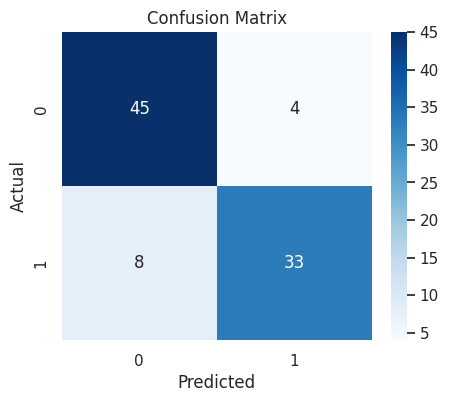

In [1080]:
# Display the confusion matrix using seaborn heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_data['Survived'], prediction)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [1081]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision, recall, and F1-score
precision = precision_score(test_data['Survived'], prediction)
recall = recall_score(test_data['Survived'], prediction)
f1 = f1_score(test_data['Survived'], prediction)

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Precision: 0.8919
Recall: 0.8049
F1-Score: 0.8462


#Problem 2

In [1082]:
url = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
df = pd.read_csv(url)

df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


## Exploratory Data Analysis

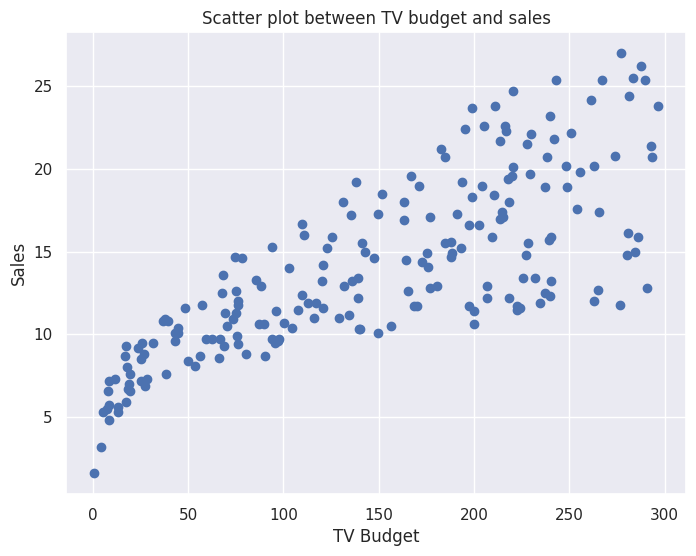

In [1083]:
plt.figure(figsize=(8, 6))
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.title('Scatter plot between TV budget and sales')
plt.show()

In [1084]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


## Preprocessing

In [1085]:
# Check the missing values
print("Percentage of missing values in a column:\n")
print(((df.isna().sum())/df.shape[0])*100)

Percentage of missing values in a column:

TV       0.0
Sales    0.0
dtype: float64


In [1086]:
import scipy.stats as stats

df_n = stats.zscore(df[['TV']], axis=0)
df['TV'] = df_n
df.head()

,TV,Sales
0,0.969852,22.1
1,-1.197376,10.4
2,-1.516155,9.3
3,0.052050,18.5
4,0.394182,12.9


## Splitting the data

In [1087]:
np.random.seed(42)
total_samples = len(df)
train_size = int(0.8 * total_samples)

df = df.sample(frac=1).reset_index(drop=True) # Shuffle the dataset to ensure randomness

train_data = df[:train_size]
test_data = df[train_size:]
print("Size of train and test dataset:", train_data.shape[0], test_data.shape[0])

Size of train and test dataset: 160 40


## Implementation of linear regression model

In [1088]:
def costFunction(tv, sales, weight, bias):
    error = 0.0

    for i in range(len(tv)):
        error += (sales[i] - (weight * tv[i] +bias))**2

    return error/len(tv)

In [1089]:
def updateWeights(tv, sales, weight, bias, learningRate):
    wderiv = 0.0
    bderiv = 0.0

    for i in range(len(tv)):
        wderiv += (-1) * tv[i] * (sales[i] - (weight * tv[i] + bias))
        bderiv += (-1) * (sales[i] - (weight * tv[i] + bias))

    weight -= (wderiv / len(tv)) * learningRate
    bias -= (bderiv / len(tv)) * learningRate

    return weight, bias

In [1090]:
def linearRegression(tv, sales, weight, bias, learningRate, n):
    costHis = []

    for i in range(n):
        weight, bias = updateWeights(tv, sales, weight, bias, learningRate)

        cost = costFunction(tv, sales, weight, bias)
        costHis.append(cost)

    return weight, bias, costHis

Weight: 4.059093907145814 Bias: 14.05261964754996


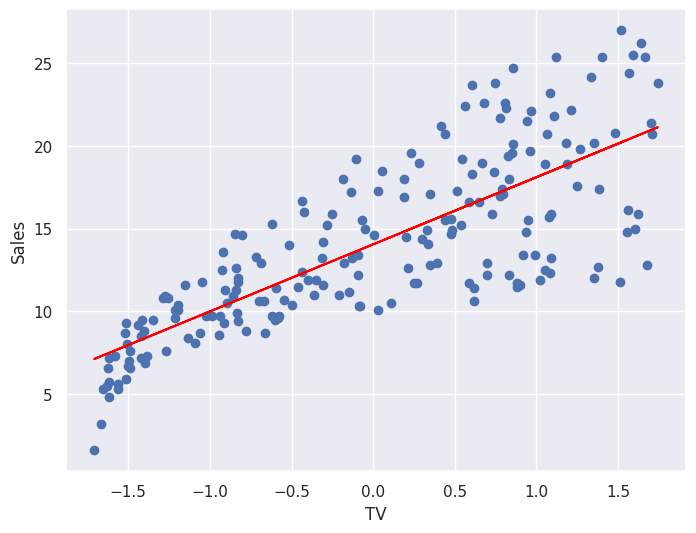

In [1091]:
# Set the parameters
tv = train_data['TV'].values
sales = train_data['Sales'].values
bias = 0
weight = 0
learningRate = 0.01
n = 1000

weight , bias , costHis = linearRegression(tv, sales, weight, bias, learningRate, n)

print("Weight:", weight, "Bias:", bias)
plt.figure(figsize=(8, 6))
plt.scatter(df['TV'], df['Sales'])
plt.plot(df['TV'] , weight*df['TV'] + bias, color = 'red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

Mean absolute error: 2.836527372945631
Mean squared error: 11.992035659957349


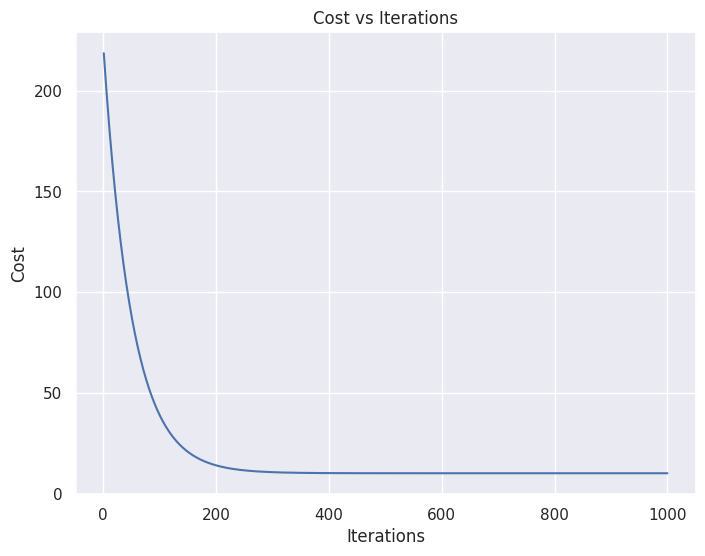

In [1092]:
# Visualise the error
from sklearn.metrics import mean_absolute_error , mean_squared_error

print("Mean absolute error:", mean_absolute_error(test_data['Sales'], weight*test_data['TV'] + bias))
print("Mean squared error:", mean_squared_error(test_data['Sales'], weight*test_data['TV'] + bias))

iter = range(1, len(costHis) + 1)
plt.figure(figsize=(8, 6))
plt.plot(iter, costHis)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

# Problem 3


In [1093]:
# Mount the drive
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


## Exploratory Data Analysis

In [1094]:
# Read the data
df = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/bostonHousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [1095]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


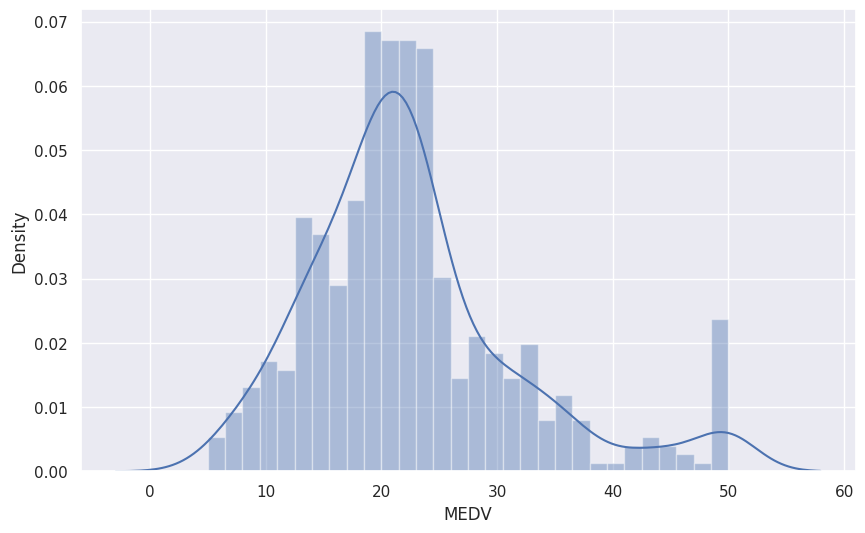

In [1096]:
# Distribution of target variable
sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

<Axes: title={'center': 'Correlation of Features'}>

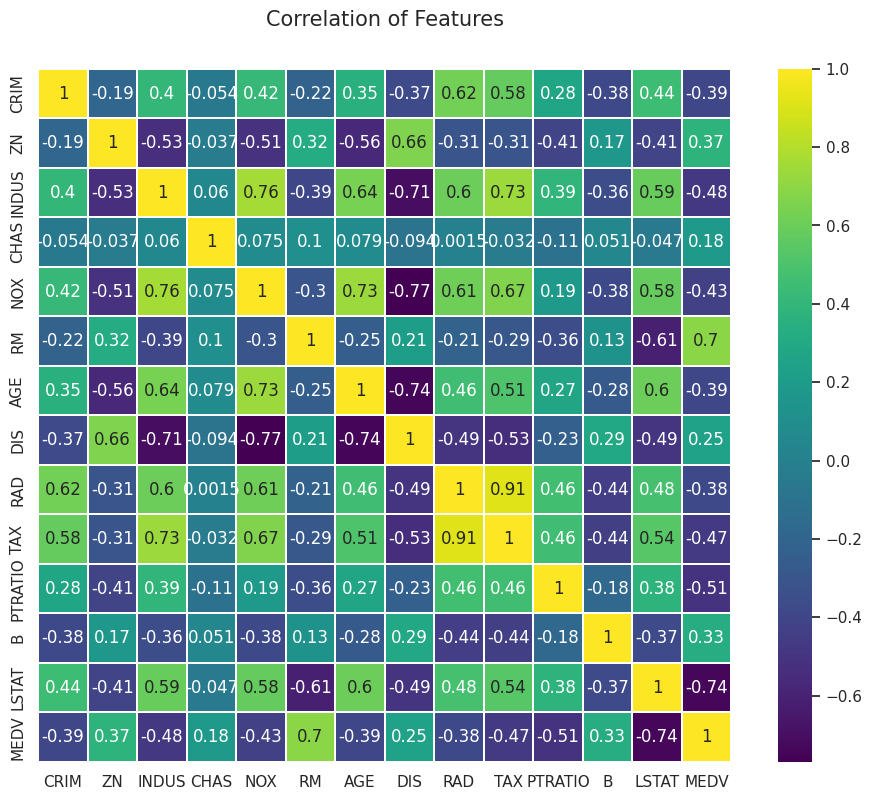

In [1097]:
# Heat map to visualise the correlation between features
colormap = plt.cm.viridis
plt.figure(figsize=(12,9))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Preprocessing

In [1098]:
# Check the percentage of missing values in each column
print("Percentage of missing values in a column:\n")
print(((df.isna().sum())/df.shape[0])*100)

Percentage of missing values in a column:

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64


In [1099]:
# Fill the missing value with mean of their column
df = df.apply(lambda col: col.fillna(col.mean()))

print("Percentage of missing values in a column:\n")
print(((df.isna().sum())/df.shape[0])*100)

Percentage of missing values in a column:

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64


## Splitting the data

In [1100]:
# Splitting the data into train and test
y = df['MEDV']
x = df.drop('MEDV', axis=1)
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Implementation of multiple linear regression

In [1101]:
# Function to compute the cost
def compute_cost(X, y, w, b):
    m = len(y)
    predictions = np.dot(X, w) + b
    cost = np.sum((predictions - y.reshape(-1, 1))**2) / (2 * m)
    return cost

# Function to apply normalisation
def featureScaling(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled

In [1102]:
# Function to update the weights using gradient descent
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = len(y)

    for i in range(num_iterations):

        # Calculate prediction and error
        predictions = np.dot(X, w) + b
        errors = predictions - y.reshape(-1, 1)

        # Update weights
        temp_w = (learning_rate / m) * np.dot(X.T, errors)
        temp_b = (learning_rate / m) * np.sum(errors)
        w -= temp_w
        b -= temp_b

        cost = compute_cost(X, y, w, b)

    return w, b

In [1103]:
# Add a column of ones to the input for the bias term
train_x = np.c_[np.ones((404, 1)), featureScaling(train_x)]

num_features = train_x.shape[1]

# Convert the pandas dataframe into numpy arrays
train_y = train_y.to_numpy()
test_y = test_y.to_numpy()

# Set the parameters
w = 0
b = 0
learning_rate = 0.01
num_iterations = 10000

w_trained, b_trained = gradient_descent(train_x, train_y, w, b, learning_rate, num_iterations)

# Evaluating performance on test dataset
test_x = np.c_[np.ones((102, 1)), featureScaling(test_x)]
predictions = np.dot(test_x, w_trained) + b_trained

mse = np.mean((predictions - test_y.reshape(-1, 1))**2)
print(f"Mean Square Error on Test Data: {mse}")

aer = np.mean((predictions - test_y.reshape(-1, 1)))
print(f"Absolute Error on Test Data: {aer}")

Mean Square Error on Test Data: 28.182861752649135
Absolute Error on Test Data: 1.3082993593476848


Plot below represents the difference of predicted values from the ideal line.

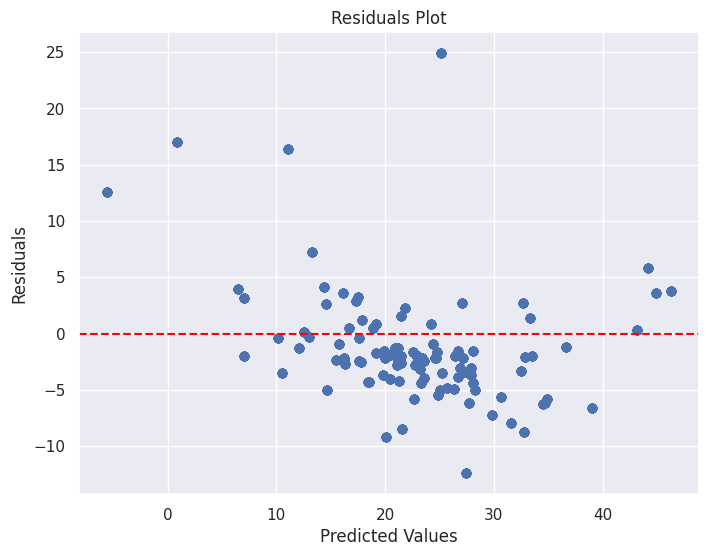

In [1104]:
residuals = test_y.reshape(-1, 1) - predictions

plt.figure(figsize=(8,6))
plt.scatter(predictions, residuals)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()